In [2]:
'''
tensorflow2.x执行流程（及时执行模式）
'''
import tensorflow as tf

print('tensorflow版本:', tf.__version__)

# a = tf.Variable([[1, 2], [3, 4]])
# b = tf.Variable([[1], [2]])
# print(a.numpy(), '\n-----------------------\n', b.numpy())
# c = tf.matmul(a, b)
# print(c.numpy())


tensorflow版本: 2.13.1


训练后的参数: W = 2.545, b = 0.284
32/32 [==============================] - 0s 549us/step


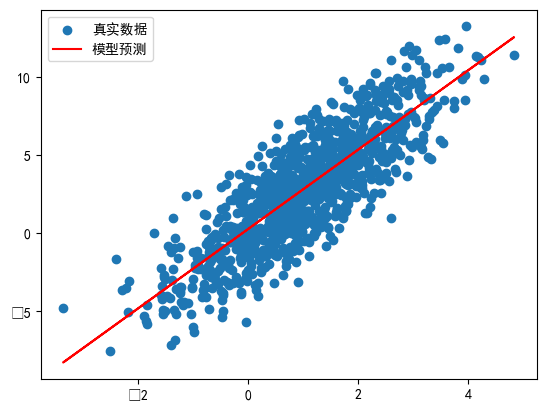

In [9]:
'''
tensorflow实现回归任务
'''
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

#构造数据
num_points = 1000
x = []
y = []
for i in range(num_points):
    x_i = tf.random.normal([1], mean=1, stddev=1.2, seed=123).numpy()
    y_i = 2.5 * x_i + 0.2 + tf.random.normal([1], mean=0.05, stddev=2, seed=40).numpy()
    x.append(x_i)
    y.append(y_i)

#构建线性回归模型
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,), activation=None)  # 单神经元，无激活函数
])
#编译模型（定义优化器和损失函数）
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())  #均方误差损失函数
#训练模型
model.fit(x=np.array(x), y=np.array(y), epochs=10000, verbose=0)
#获取训练得到的模型参数信息
W, b = model.layers[0].get_weights()
print(f"训练后的参数: W = {W[0][0]:.3f}, b = {b[0]:.3f}")

# 6.预测并绘制回归直线
y_pred = model.predict(np.array(x))

#解决中文乱码
plt.rcParams['font.sans-serif']=['SimHei']
plt.scatter(x, y, label="真实数据")
plt.plot(x, y_pred, color='red', label='模型预测')
plt.legend()
plt.show()
